In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub 

<h2> Analisis Dataset Telco-churn
<h3> Dataset desc: <br>
<blockquote>
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
</blockquote>



In [21]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Farre\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


<blockquote>
Download dataset menggunakan API KaggleHub
</blockquote>

In [22]:
df = pd.read_csv("data/telco-churn.csv")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

<blockquote>
 Line pertama dari blok kode diatas untuk membaca dataset, lalu line ubah salah satu kolom menjadi numerik.
</blockquote>

In [23]:
num_df = df.select_dtypes(include=[np.number])
desc_stats = num_df.describe().T
desc_stats["Q1"] = num_df.quantile(0.25)
desc_stats["Q2"] = num_df.quantile(0.50)
desc_stats["Q3"] = num_df.quantile(0.75)

print("===== Statistik Deskriptif =====")
print(desc_stats)


===== Statistik Deskriptif =====
                 count         mean          std    min     25%       50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.000   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.000   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.45  1397.475   

                      75%      max      Q1        Q2         Q3  
SeniorCitizen      0.0000     1.00    0.00     0.000     0.0000  
tenure            55.0000    72.00    9.00    29.000    55.0000  
MonthlyCharges    89.8500   118.75   35.50    70.350    89.8500  
TotalCharges    3794.7375  8684.80  401.45  1397.475  3794.7375  


<blockquote>
Menampilkan mean, std, min, max, Q1, Q2, Q3 dengan memastikan hanya kolom numerik
</blockquote>

In [24]:
print(df.select_dtypes(include=[np.number]).head(10))

   SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65
5              0       8           99.65        820.50
6              0      22           89.10       1949.40
7              0      10           29.75        301.90
8              0      28          104.80       3046.05
9              0      62           56.15       3487.95


<blockquote>
Tampilkan 10 record pertama kolom numerik

In [25]:
num_records = df.shape[0]
num_attributes = df.shape[1]
attribute_names = df.columns.tolist()
num_numeric_attributes = df.select_dtypes(include=[np.number]).shape[1]


print("\n===== Info Dataset =====")
print(f"Jumlah record: {num_records}")
print(f"Jumlah atribut: {num_attributes}")
print(f"Nama atribut: {attribute_names}")
print(f"Jumlah atribut numerik: {num_numeric_attributes}")


===== Info Dataset =====
Jumlah record: 7043
Jumlah atribut: 21
Nama atribut: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Jumlah atribut numerik: 4


<blockquote>menampilkan informasi dataset

In [26]:
object_columns = df.select_dtypes(include=['object']).columns
object_unique_counts = {col: df[col].nunique() for col in object_columns}


print("\n===== Jumlah Label pada Kolom Object =====")
for col, count in object_unique_counts.items():
    print(f"{col}: {count}")


===== Jumlah Label pada Kolom Object =====
customerID: 7043
gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


<blockquote>menghitung jumlah nilai unik untuk setiap atribut bertipe object

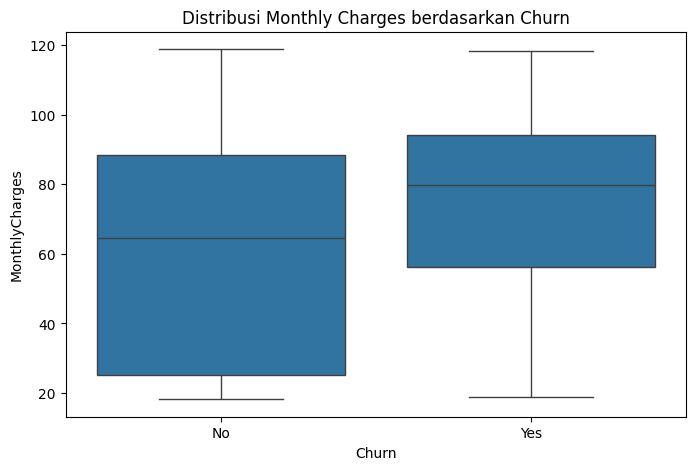

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Distribusi Monthly Charges berdasarkan Churn")
plt.show()

<blockquote>visualisasi dataset

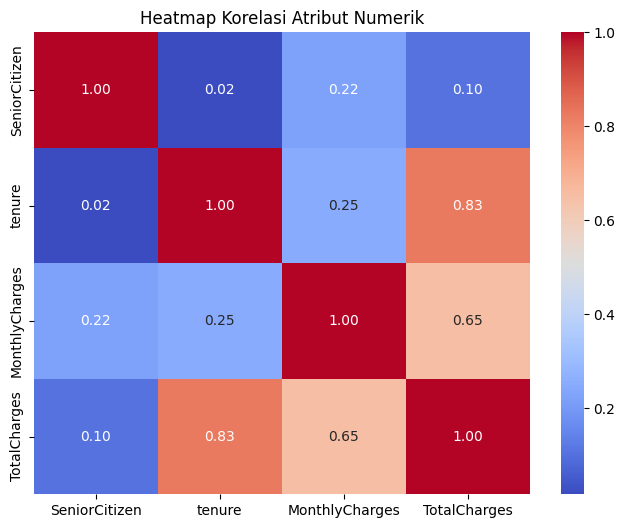

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

<blockquote>korelasi

<h2> Kesimpulan
<blockquote>
<h6>
- Mayoritas pelanggan bukan lansia (~84%) <br>
- Rata-rata lama berlangganan 32 bulan<br>
- Biaya bulanan tinggi cenderung lebih sering churn<br>
- TotalCharges sangat dipengaruhi oleh tenure (lama berlangganan)
</blockquote>